In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

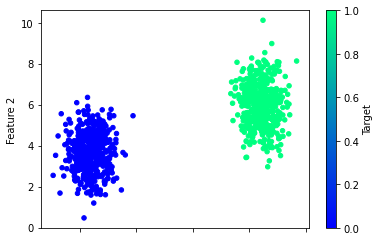

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 865us/step - loss: 0.7727 - accuracy: 0.0813
Epoch 2/100
24/24 [==============================] - 0s 757us/step - loss: 0.7604 - accuracy: 0.0040
Epoch 3/100
24/24 [==============================] - 0s 824us/step - loss: 0.7497 - accuracy: 0.0040
Epoch 4/100
24/24 [==============================] - 0s 784us/step - loss: 0.7405 - accuracy: 0.0040
Epoch 5/100
24/24 [==============================] - 0s 889us/step - loss: 0.7326 - accuracy: 0.0053
Epoch 6/100
24/24 [==============================] - 0s 838us/step - loss: 0.7255 - accuracy: 0.0107
Epoch 7/100
24/24 [==============================] - 0s 765us/step - loss: 0.7194 - accuracy: 0.0200
Epoch 8/100
24/24 [==============================] - 0s 779us/step - loss: 0.7140 - accuracy: 0.0413
Epoch 9/100
24/24 [==============================] - 0s 866us/step - loss: 0.7094 - accuracy: 0.0653
Epoch 10/100
24/24 [==============================] - 0s 729us/step - loss: 0.7052 - accura

24/24 [==============================] - 0s 734us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 82/100
24/24 [==============================] - 0s 736us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 83/100
24/24 [==============================] - 0s 779us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 84/100
24/24 [==============================] - 0s 773us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 85/100
24/24 [==============================] - 0s 702us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 86/100
24/24 [==============================] - 0s 798us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 87/100
24/24 [==============================] - 0s 774us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 88/100
24/24 [==============================] - 0s 768us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 89/100
24/24 [==============================] - 0s 866us/step - loss: 0.6931 - accuracy: 0.5067
Epoch 90/100
24/24 [==============================] - 0s 781us/step - loss: 0.6931 - accuracy: 

<AxesSubplot:>

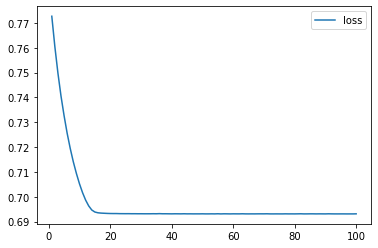

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

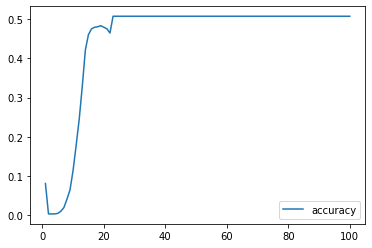

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6937 - accuracy: 0.4800 - 101ms/epoch - 13ms/step
Loss: 0.6937404274940491, Accuracy: 0.47999998927116394


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
#(nn_model.predict(new_X_scaled) > 0.5).astype("int32")
nn_model.predict(new_X_scaled)

array([[0.4936071],
       [0.4936071],
       [0.4936071],
       [0.4936071],
       [0.4936071],
       [0.4936071],
       [0.4936071],
       [0.4936071],
       [0.4936071],
       [0.4936071]], dtype=float32)